In [41]:
from typing import List
from random import choice
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt

# Структура графу

Розмір графу - **n * n**

Кожна вершина має зв'язки із:

- вершиною, різниця індексів яких по модулю = **1**(крім _крайніх вершин_)
- вершиною, різниця індексів яких по модулю = **n**

Зв'язки представлені у вигляді масиву масивів, де елемент масиву містить **масив індексів вершин**, які приєднані до **індексу цього елементу**.

Видалення ребер виконується випадково, але із перевіркою на **зв'язність графу**.

![title](https://raw.githubusercontent.com/mezgoodle/images/master/image_2022-09-26_16-17-06.png)

In [42]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self.adjList: List[list] = [[] for _ in range(self.double_n)]
        self.edges_n = 0
        self._create_edges()

    def _create_edges(self): 
        for src in range(self.double_n):
            for dest in range(self.double_n):
                if abs(dest - src) == self.n:
                    self.adjList[src].append(dest)
                    self.edges_n += 1
                if abs(dest - src) == 1:
                    if (src % self.n == 0 and (dest + 1) % self.n == 0) or (dest % self.n == 0 and (src + 1) % self.n == 0):
                        continue
                    self.adjList[src].append(dest)
                    self.edges_n += 1
    
    def get_adjList(self):
        return {point: tuple(connections) for point, connections in enumerate(self.adjList)}

    def delete_edges(self, delete_n: int):
        if delete_n > self.edges_n / 2 + 1 - self.double_n:
            raise Exception(f'Delete number must be less or equal than {int(self.edges_n / 2 + 1 - self.double_n)}')
        for _ in range(delete_n):
            edges = []
            while True:
                temp_list = deepcopy(self.adjList)
                adjList_copy = deepcopy(self.adjList)
                point = choice(range(len(temp_list)))
                connected_point = choice(temp_list[point])
                if [point, connected_point] in edges:
                  continue
                edges.append([point, connected_point])
                temp_list[point].remove(connected_point)
                temp_list[connected_point].remove(point)
                self.adjList = temp_list
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.adjList = adjList_copy
    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.adjList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
    
        return True

In [43]:
n = 3

In [44]:
graph = Graph(n)

In [45]:
graph.edges_n

24

In [46]:
graph.adjList

[[1, 3],
 [0, 2, 4],
 [1, 5],
 [0, 4, 6],
 [1, 3, 5, 7],
 [2, 4, 8],
 [3, 7],
 [4, 6, 8],
 [5, 7]]

In [47]:
edges_dict = graph.get_adjList()
edges_dict

{0: (1, 3),
 1: (0, 2, 4),
 2: (1, 5),
 3: (0, 4, 6),
 4: (1, 3, 5, 7),
 5: (2, 4, 8),
 6: (3, 7),
 7: (4, 6, 8),
 8: (5, 7)}

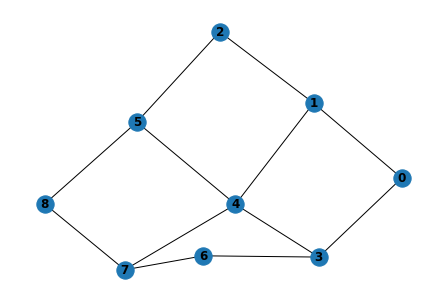

In [48]:
H = nx.Graph(edges_dict)
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

In [49]:
graph.isStronglyConnected()

True

In [50]:
graph.delete_edges(5)

Exception: ignored

In [ ]:
edges_dict = graph.get_adjList()
edges_dict

In [ ]:
H = nx.Graph(edges_dict)

In [ ]:
list(H.edges())

In [ ]:
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()  